<a href="https://colab.research.google.com/github/MoshiulRabbi/CodeWCoke/blob/master/Django_avocado_classify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First Ill Import the necessary library

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Ive Uploaded the Dataset from Local device

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving avocado.csv to avocado (1).csv
User uploaded file "avocado.csv" with length 1989197 bytes


After Uploading the dataset, Ill load the dataset and convert it to a Pandas DataFrame and view the first 7 row of it

In [ ]:
import io
avocado = pd.read_csv(io.BytesIO(uploaded['avocado.csv']))
avocado.head(7)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany


#Checking the dataset objects

In [ ]:
print(avocado.keys())

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')


In [ ]:
type(avocado)

pandas.core.frame.DataFrame

In [ ]:
avocado.shape

(18249, 11)

#Lets remove the unnecessary data from our dataset

In [ ]:
avocado = avocado.drop(['Unnamed: 0','Date','region','year'],axis=1)


In [ ]:
avocado.head(4)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional


#Model Train and Data Visualization

Spliting the Target data and the other part of the data to train a model 

In [ ]:
X = avocado.drop('type',axis=1)
y = avocado['type']

In [ ]:
df = pd.DataFrame(X)
print(df.head(10))

   AveragePrice  Total Volume     4046  ...  Small Bags  Large Bags  XLarge Bags
0          1.33      64236.62  1036.74  ...     8603.62       93.25          0.0
1          1.35      54876.98   674.28  ...     9408.07       97.49          0.0
2          0.93     118220.22   794.70  ...     8042.21      103.14          0.0
3          1.08      78992.15  1132.00  ...     5677.40      133.76          0.0
4          1.28      51039.60   941.48  ...     5986.26      197.69          0.0
5          1.26      55979.78  1184.27  ...     6556.47      127.44          0.0
6          0.99      83453.76  1368.92  ...     8196.81      122.05          0.0
7          0.98     109428.33   703.75  ...     6266.85      562.37          0.0
8          1.02      99811.42  1022.15  ...    11104.53      283.83          0.0
9          1.07      74338.76   842.40  ...     8061.47      564.45          0.0

[10 rows x 9 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


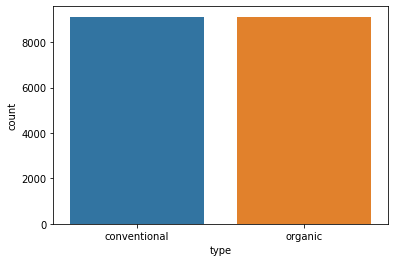

In [ ]:
sns.countplot(avocado['type'])

In [ ]:
 df = pd.DataFrame(X)
 df.head(4)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0


We will use KnNeighbor Classifier to Classify Our Avocado Type and will check our trained model performance by giving manual user input value

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X, y)
prediction = knn.predict([[1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0]])
print(f"Our predicted avocado is {prediction} \n")
print(f" This is the value of all the avovado type in our dataset \n {y}")


Our predicted avocado is ['conventional'] 

 This is the value of all the avovado type in our dataset 
 0        conventional
1        conventional
2        conventional
3        conventional
4        conventional
             ...     
18244         organic
18245         organic
18246         organic
18247         organic
18248         organic
Name: type, Length: 18249, dtype: object


Everything is great so far,
Lets train the actual splited dataset and check the accuracy score of out model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
a_model = KNeighborsClassifier(n_neighbors=8)
a_model.fit(X_train,y_train)
pred2 = a_model.predict(X_test)
print("Test set predictions:\n {}".format(pred2))
print(f"\n \n And the accuracy score is ......{knn.score(X_test, y_test)}")

Test set predictions:
 ['conventional' 'conventional' 'organic' ... 'organic' 'organic'
 'conventional']

 
 And the accuracy score is ......0.9835630084675411


Almost Perfect.
Now we will check the performance of our model changing the k value of knnClassifier and visulize it

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=15)
n_neighbors=range(2,31)
scores=[]
for k in n_neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(model.score(X_test, y_test))
    

Text(0, 0.5, 'accuracy score')

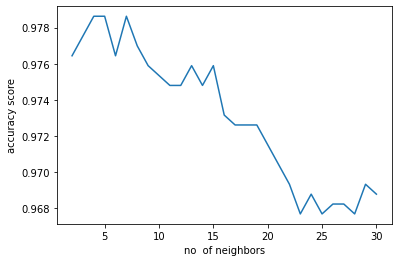

In [ ]:
plt.plot(n_neighbors, scores)
plt.xlabel('no  of neighbors')
plt.ylabel('accuracy score')

Pickle Model saving


In [ ]:
import pickle

# save the model to disk
filename = 'a_model.pkl'
pickle.dump(a_model, open(filename, 'wb'))
 

In [ ]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9764383561643836


In [ ]:
prediction = loaded_model.predict([[1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0]])
print(f"Our predicted avocado is {prediction} \n")

Our predicted avocado is ['conventional'] 



In [ ]:
{
"AveragePrice":"1.33",
"Total_Volume":"64236.62",
"q_4046":"1036.74",
"q_4225":"54454.85",
"q_4770":"48.16",
"Total_Bags":"8696.87",
"Small_Bags":"8603.62",
"Large_Bags":"93.25",
"XLarge_Bags":"0.0"
}

In [ ]:
avocado.tail(4)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic
18248,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic
